# **Detección de fraudes con tarjetas de crédito**

Enlace al dataset: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

### Importar las bibliotecas necesarias

In [1]:
# Importa la bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Importar y organizar el dataset

In [2]:
# Organizar los datos en un dataframe
dataframe= pd.read_csv(r'C:\Users\sofia\OneDrive\UAX\IA IBM\creditcard.csv\creditcard.csv')

In [3]:
dataframe.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
dataframe.Class.unique()

array([0, 1])

### Limpiar los datos

a. Valores perdidos

In [5]:

valores_nulos=dataframe.isnull().sum()

print("Cantidad de valores nulos en cada columna:")
print(valores_nulos)

Cantidad de valores nulos en cada columna:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [6]:
dataframe_limpio_nulos = dataframe.dropna()

b. Datos duplicados

In [7]:

filas_duplicadas=dataframe_limpio_nulos.duplicated().sum()

print(f"Cantidad de filas duplicadas: {filas_duplicadas}")

Cantidad de filas duplicadas: 1081


In [8]:
# Eliminar filas duplicadas
df_limpio = dataframe_limpio_nulos.drop_duplicates()

# Verificar la cantidad de filas después de la limpieza
print(f"Cantidad de filas después de limpiar datos: {len(df_limpio)}")

Cantidad de filas después de limpiar datos: 283726


### Analizar los datos

¿Cuál es el porcentaje de transacciones fraudulentas en el dataset?



In [9]:
# Calcula el porcentaje de transacciones fraudulentas
transacciones_fraudulentas=(df_limpio['Class']==1).sum()
total_transacciones=len(df_limpio)
porcentaje_tf=(transacciones_fraudulentas/total_transacciones)*100

# Muestra el porcentaje de transacciones fraudulentas
print(f"El porcentaje de transacciones fraudulentas es: {porcentaje_tf:.2f}%")


El porcentaje de transacciones fraudulentas es: 0.17%


¿Cuál es el importe medio de las transacciones fraudulentas?



In [10]:
# Calcula el importe medio de las transacciones fraudulentas
transacciones_fraudulentas=df_limpio[df_limpio['Class']==1]
importe_medio_tf=transacciones_fraudulentas['Amount'].mean()
# Muestra el importe medio de las transacciones fraudulentas
print(f'El importe medio de las operaciones fraudulentas es: {importe_medio_tf:.2f}')

El importe medio de las operaciones fraudulentas es: 123.87


### Visualizar los datos


Pregunta 1: ¿Cuántas transacciones fraudulentas hay en comparación con las no fraudulentas? (Utiliza un gráfico de barras)

Existen 473 transacciones fraudulentas 
Existen 283253 transacciones no fraudulentas


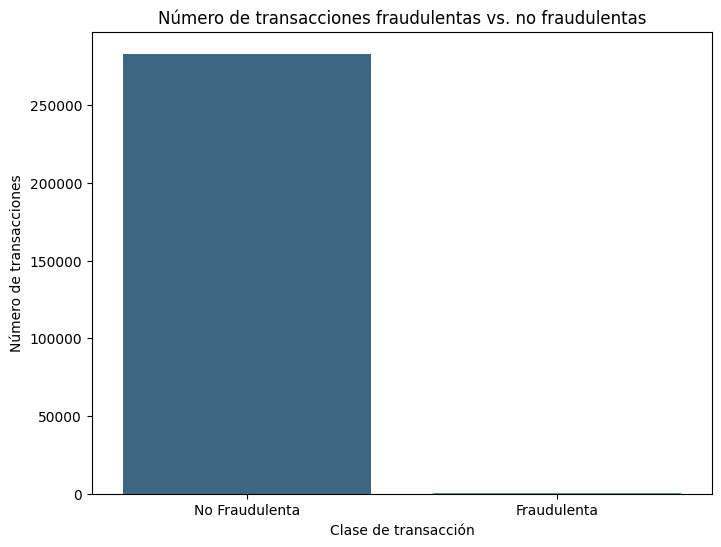

In [13]:
# Cuenta el número de transacciones fraudulentas y no fraudulentes
suma_tf=(df_limpio['Class']==1).sum()
suma_tnf=(df_limpio['Class']==0).sum()

print(f'Existen {suma_tf} transacciones fraudulentas ')
print(f'Existen {suma_tnf} transacciones no fraudulentas')

# Muestra la distribución de las traducciones fraudulentas con respecto de las no fraudulentas
plt.figure(figsize=(8, 6))
sns.countplot(x='Class',data=df_limpio, palette='viridis') 
plt.title('Número de transacciones fraudulentas vs. no fraudulentas')
plt.xlabel('Clase de transacción')
plt.ylabel('Número de transacciones')
plt.xticks(ticks=[0, 1], labels=['No Fraudulenta', 'Fraudulenta'])
plt.show()

Pregunta 2: ¿Cuál es la distribución de los importes de las transacciones fraudulentas? (Utiliza un histograma)


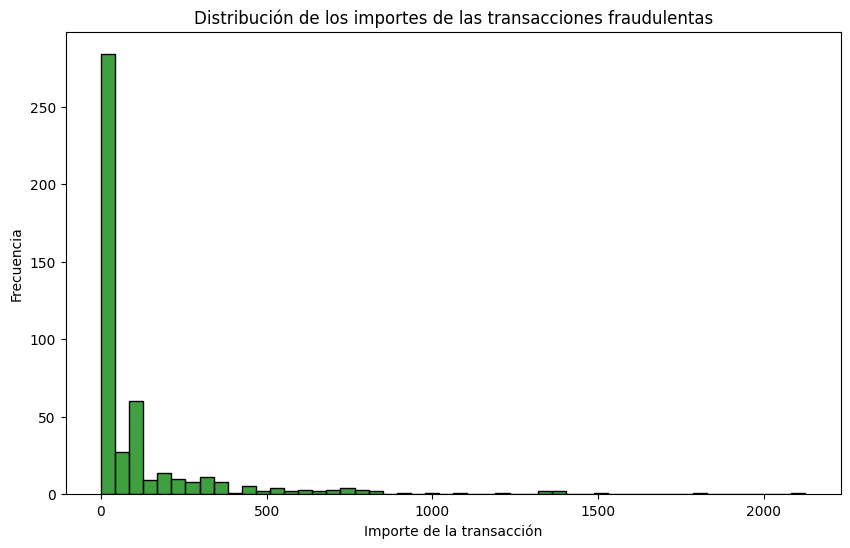

In [14]:
# Separa los datos de transacciones fraudulentas
datos_transacciones_fraudulentas=df_limpio[df_limpio['Class']==1] 

# Muestra la distribución de los importes de las transacciones fraudulentas
plt.figure(figsize=(10, 6))
sns.histplot(datos_transacciones_fraudulentas['Amount'], bins=50, color='green')

plt.title('Distribución de los importes de las transacciones fraudulentas')
plt.xlabel('Importe de la transacción')
plt.ylabel('Frecuencia')
plt.show()

## Desarrollo y evaluación de modelos

### Separar el dataset

In [15]:
# Separa los datos de entrenamiento y evaluación
from sklearn.model_selection import train_test_split


In [16]:
X=df_limpio.drop('Class',axis=1)
y=df_limpio['Class']

In [17]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,  random_state=42)

### Crea y evalúa los modelos

In [18]:
#Escribe tu código aquí
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [19]:
randomforest=RandomForestClassifier(max_depth=150, random_state=42)

In [20]:
randomforest.fit(X_train,y_train)

RandomForestClassifier(max_depth=150, random_state=42)

In [21]:
y_pred=randomforest.predict(X_test)

In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.97      0.73      0.84        90

    accuracy                           1.00     56746
   macro avg       0.99      0.87      0.92     56746
weighted avg       1.00      1.00      1.00     56746



In [23]:
exactitud_general=accuracy_score(y_test,y_pred)

In [24]:
print(f'La exactitud general del modelo con los datos de evaluacion es: {(exactitud_general*100):.2f} %')

La exactitud general del modelo con los datos de evaluacion es: 99.95 %
